***Gradiant Boosting***

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

More details @
https://en.wikipedia.org/wiki/Gradient_boosting

***AdaBoost Algorithm***

AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm formulated by Yoav Freund and
Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers. In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.

More details @

https://en.wikipedia.org/wiki/AdaBoost

In this lab, you’ll explore the breast cancer dataset and try to train the model to predict if the person is having breast cancer or not. We will start off with a weak learner, a decision tree with maximum depth = 2.

We will then build an adaboost ensemble with 50 trees with a step of 3 and compare the performance with the weak learner.

In [2]:
#importing the required packages

import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')


In [3]:
#loading the data from sklearn

cancer = load_breast_cancer()
digits = load_digits()

data = cancer

In [9]:
#converting into pandas data frame
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])
df['target'] = df['target'].astype('uint16')

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
#getting X and y

X = df.drop('target', axis=1)
y = df['target']

In [13]:
X.shape

(569, 30)

In [14]:
y.shape

(569,)

In [16]:
#importing train test split
from sklearn.model_selection import train_test_split


In [17]:
#spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [18]:
#checking uniformity
print(y_train.mean())
print(y_test.mean())

0.6263736263736264
0.631578947368421


### Getting the predictions from weak learner

In [19]:
shallow_tree = DecisionTreeClassifier(max_depth= 2, random_state= 100)

shallow_tree.fit(X_train,y_train)

y_pred = shallow_tree.predict(X_test)

In [20]:
metrics.accuracy_score(y_test,y_pred)

0.9385964912280702

### Using Adaboost to boost the accuracy

In [23]:
#running adaboost for weak learner 'shallow_tree' and improving the accuracy

estimators = list(range(1,100,3))
boost_scores = []

for i in estimators:
    
    ABC = AdaBoostClassifier(base_estimator= shallow_tree, n_estimators= i)
    ABC.fit(X_train,y_train)
    pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test,pred)
    boost_scores.append(score)


In [24]:
#accuracy score list
boost_scores

[0.9473684210526315,
 0.9298245614035088,
 0.9912280701754386,
 0.9385964912280702,
 0.9385964912280702,
 0.9473684210526315,
 0.9649122807017544,
 0.956140350877193,
 0.9473684210526315,
 0.9736842105263158,
 0.9649122807017544,
 0.9824561403508771,
 0.9736842105263158,
 0.9736842105263158,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9649122807017544,
 0.9824561403508771,
 0.9736842105263158,
 0.9824561403508771,
 0.9736842105263158,
 0.9912280701754386,
 0.9824561403508771,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9912280701754386,
 0.9736842105263158,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386]

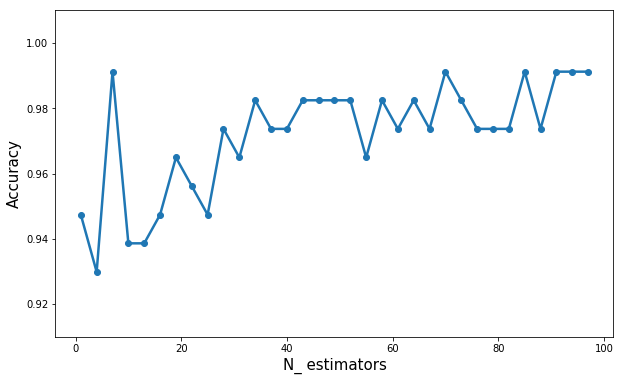

In [28]:
#plot the accuracy scores

plt.figure(figsize = (10,6))

plt.plot(estimators, boost_scores, linestyle = '-', linewidth = 2.5,marker = 'o')
plt.xlabel('N_ estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.ylim([0.91,1.01])
plt.show()

In [29]:
ABC = AdaBoostClassifier(base_estimator= shallow_tree, n_estimators= 100)
ABC.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [30]:
y_pred = ABC.predict(X_test)

In [31]:
metrics.accuracy_score(y_test,y_pred)

0.9912280701754386